In [ ]:
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# loading the data into the dataframe
df = pd.read_csv('/content/Siliguri.csv')
print(df)

             From Date        PM10        NO2      Ozone        CO       Temp  \
0        1/2/2019 0:00  195.190000  51.110000  28.230000  0.720000  19.750000   
1        2/2/2019 0:00  154.420000  44.240000  34.470000  0.840000  19.360000   
2        3/2/2019 0:00  246.220000  47.800000  38.200000  1.190000  19.170000   
3        4/2/2019 0:00  243.220000  49.080000  33.680000  0.930000  18.850000   
4        5/2/2019 0:00  275.090000  43.090000  36.720000  0.860000  19.310000   
...                ...         ...        ...        ...       ...        ...   
1851  26-02-2024 00:00  128.610000  51.150000  35.440000  0.750000  23.740000   
1852  27-02-2024 00:00  132.520000  51.560000  35.190000  0.660000  23.740000   
1853  28-02-2024 00:00  128.420000  49.090000  35.790000  0.770000  23.740000   
1854  29-02-2024 00:00  155.730000  49.580000  37.130000  0.770000  23.740000   
1855               NaN   93.942809  29.540717  29.078312  0.723655  23.744555   

             RH  
0     62.

In [ ]:
# viewing info about the columns
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  1855 non-null   object 
 1   PM10       1856 non-null   float64
 2   NO2        1856 non-null   float64
 3   Ozone      1855 non-null   float64
 4   CO         1856 non-null   float64
 5   Temp       1856 non-null   float64
 6   RH         1856 non-null   float64
dtypes: float64(6), object(1)
memory usage: 101.6+ KB


In [ ]:
#viewing few rows from the top
df.head()

,From Date,PM10,NO2,Ozone,CO,Temp,RH
0,1/2/2019 0:00,195.19,51.11,28.23,0.72,19.75,62.64
1,2/2/2019 0:00,154.42,44.24,34.47,0.84,19.36,66.02
2,3/2/2019 0:00,246.22,47.80,38.20,1.19,19.17,70.33
3,4/2/2019 0:00,243.22,49.08,33.68,0.93,18.85,72.97
4,5/2/2019 0:00,275.09,43.09,36.72,0.86,19.31,74.27


In [ ]:
#number of rows and columns in the dataset
print(df.shape)

(1856, 7)


In [ ]:
#statistical information about columns
print(df.describe())

              PM10          NO2        Ozone           CO         Temp  \
count  1856.000000  1856.000000  1855.000000  1856.000000  1856.000000   
mean     93.942809    29.540717    29.078312     0.723655    23.744555   
std      61.001402    13.172236    10.584526     0.236959     3.366007   
min      14.760000     2.160000     9.810000     0.100000    11.550000   
25%      42.972500    19.330000    21.310000     0.570000    23.335000   
50%      76.685000    27.190000    26.990000     0.700000    23.740000   
75%     134.352500    36.310000    34.805000     0.870000    25.990000   
max     357.340000   113.310000    73.830000     2.040000    33.380000   

                RH  
count  1856.000000  
mean     79.661542  
std      11.527849  
min      36.290000  
25%      72.600000  
50%      80.245000  
75%      88.637500  
max      97.770000  


In [ ]:
#checking how many null values are in each column
df.isnull().sum()

From Date    1
PM10         0
NO2          0
Ozone        1
CO           0
Temp         0
RH           0
dtype: int64

In [ ]:
# dropping all the rows with NaN values
df = df.dropna()

In [ ]:
#defining training and testing data
x_train = df[:1484]
y_train = x_train['NO2']
x_test = df[1484:2966]
y_test = x_test['NO2']
print(y_test)

1485    26.66
1486    27.19
1487    27.66
1488    32.55
1489    31.40
        ...  
1850    51.23
1851    51.15
1852    51.56
1853    49.09
1854    49.58
Name: NO2, Length: 370, dtype: float64


In [ ]:
df.loc[1484:2966].count() / df.shape[0] * 100

From Date    20.010787
PM10         20.010787
NO2          20.010787
Ozone        20.010787
CO           20.010787
Temp         20.010787
RH           20.010787
dtype: float64

In [ ]:
#Normalizing training data
train_norm = x_train['NO2']

#converted into array as all the methods available are for arrays and not lists
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

#Scaling all values between 0 and 1 so that large values don't just dominate
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.44039586]
[0.37858749]
[0.41061628]
[0.42213225]
[0.36824112]


In [ ]:
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  1


In [ ]:
#removing null values
train_norm = train_norm[train_norm!=0]

In [ ]:
#Normalizing testing data and repeating the same process as done for training data
test_norm = x_test['NO2']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.21521656]
[0.22537371]
[0.23438099]
[0.32809506]
[0.30605596]


In [ ]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  1


In [ ]:
#removing null values
test_norm = test_norm[test_norm != 0]

In [ ]:
print(train_norm.shape)
print(test_norm.shape)

(1483,)
(369,)


In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [ ]:
n_steps = 3
X_split_train, y_split_train = split_sequence(train_norm, n_steps)
#for i in range(len(X_split_train)):
    #print(X_split_train[i], y_split_train[i])
n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train)
    print(y_split_train)

[[[0.44039586]
  [0.37858749]
  [0.41061628]]

 [[0.37858749]
  [0.41061628]
  [0.42213225]]

 [[0.41061628]
  [0.42213225]
  [0.36824112]]

 ...

 [[0.28070175]
  [0.27602339]
  [0.24705353]]

 [[0.27602339]
  [0.24705353]
  [0.19991003]]

 [[0.24705353]
  [0.19991003]
  [0.24759334]]]
[0.42213225 0.36824112 0.45721997 ... 0.19991003 0.24759334 0.21322537]
[[[0.44039586]
  [0.37858749]
  [0.41061628]]

 [[0.37858749]
  [0.41061628]
  [0.42213225]]

 [[0.41061628]
  [0.42213225]
  [0.36824112]]

 ...

 [[0.28070175]
  [0.27602339]
  [0.24705353]]

 [[0.27602339]
  [0.24705353]
  [0.19991003]]

 [[0.24705353]
  [0.19991003]
  [0.24759334]]]
[0.42213225 0.36824112 0.45721997 ... 0.19991003 0.24759334 0.21322537]
[[[0.44039586]
  [0.37858749]
  [0.41061628]]

 [[0.37858749]
  [0.41061628]
  [0.42213225]]

 [[0.41061628]
  [0.42213225]
  [0.36824112]]

 ...

 [[0.28070175]
  [0.27602339]
  [0.24705353]]

 [[0.27602339]
  [0.24705353]
  [0.19991003]]

 [[0.24705353]
  [0.19991003]
  [0.2475

In [ ]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[0.21521656 0.22537371 0.23438099] 0.32809505557684926
[0.22537371 0.23438099 0.32809506] 0.30605596013798386
[0.23438099 0.32809506 0.30605596] 0.3493675737830586
[0.32809506 0.30605596 0.34936757] 0.3160214641625144
[0.30605596 0.34936757 0.31602146] 0.3432349559218092


In [ ]:
# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

# Optimizers
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
# For RMSprop, the following line is an example, but it's commented out since you're not using it in the final compilation
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

# Compile the model with the Adam optimizer
model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])

# Now you can fit the model with your data
# model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
# fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

Epoch 1/10
47/47 [==============================] - 3s 11ms/step - loss: 0.0404 - accuracy: 0.0000e+00 - val_loss: 0.0322 - val_accuracy: 0.0000e+00
Epoch 2/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0175 - val_accuracy: 0.0027
Epoch 3/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0123 - val_accuracy: 0.0027
Epoch 4/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0027
Epoch 5/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0027
Epoch 6/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0027
Epoch 7/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accu

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
yhat = model.predict(X_split_test)
for i in range(5):
    print(yhat[i])

12/12 [==============================] - 0s 2ms/step
[0.23142791]
[0.26599795]
[0.29317185]
[0.32921258]
[0.3269225]


In [ ]:
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('RMSE: %.5f' % rmse)
# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_split_test, yhat)
print('MAPE: %.5f' % mape)
# R-squared (R²)
r2 = abs(r2_score(y_split_test, yhat))
print('R²: %.5f' % r2)
accuracy = 100 - mape
print('Accuracy: %.5f%%' % accuracy)

MSE: 0.00898
RMSE: 0.09474
MAPE: 0.56801
R²: 0.80366
Accuracy: 99.43199%


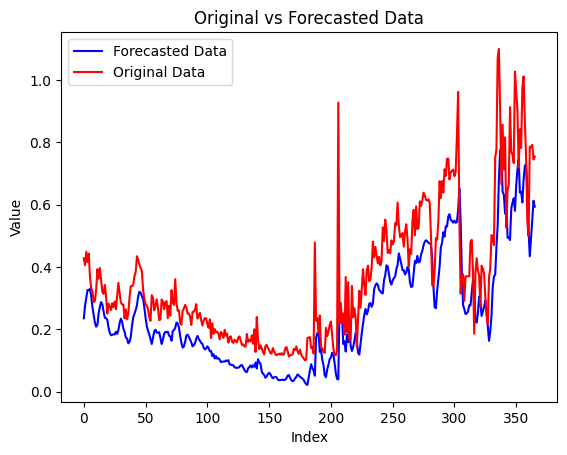

In [ ]:
# Plot forecasted data (yhat)
plt.plot(yhat, label='Forecasted Data', color='blue')

# Plot original data (y_split_test) with some vertical offset
plt.plot(y_split_test + 0.1, label='Original Data', color='red')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Original vs Forecasted Data')
plt.show()

In [ ]:
_, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
_, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.00068, Test: 0.00272


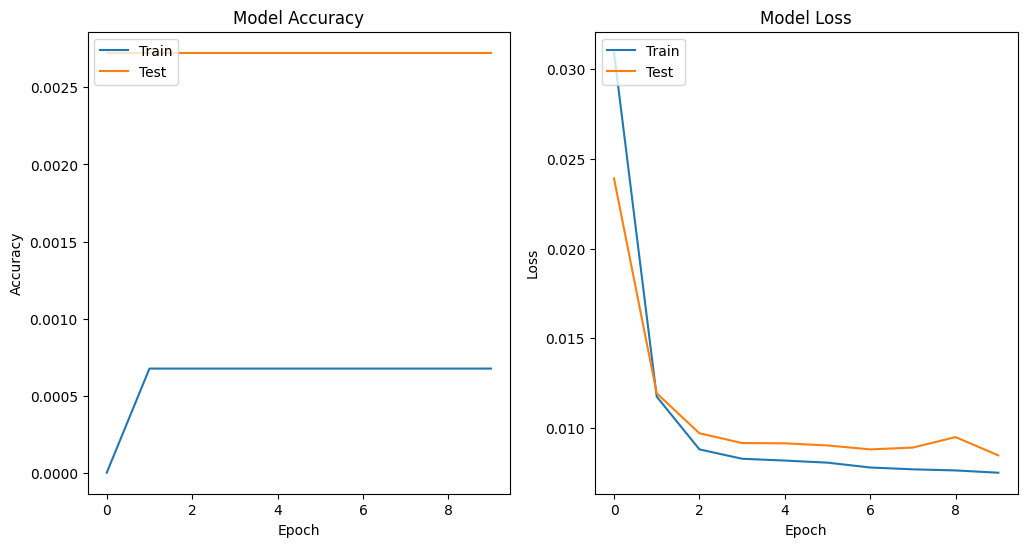

In [ ]:

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot model accuracy
ax1.plot(hist.history['accuracy'])
ax1.plot(hist.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

# Plot model loss
ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

# Display the plots
plt.show()

In [ ]:
def compute(var):
    train_norm = x_train[var]
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]

    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

    yhat = model.predict(X_split_test)
    mse = mean_squared_error(y_split_test, yhat)
    print(mse)

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
47/47 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 6.7568e-04 - val_loss: 0.0082 - val_accuracy: 0.0027
Epoch 2/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0072 - accuracy: 6.7568e-04 - val_loss: 0.0088 - val_accuracy: 0.0027
Epoch 3/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0071 - accuracy: 6.7568e-04 - val_loss: 0.0083 - val_accuracy: 0.0027
Epoch 4/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0069 - accuracy: 6.7568e-04 - val_loss: 0.0085 - val_accuracy: 0.0027
Epoch 5/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 6.7568e-04 - val_loss: 0.0081 - val_accuracy: 0.0027
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 6.7568e-04 - val_loss: 0.0090 - val_accuracy: 0.0027
Epoch 7/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 6.7568e-04 - val_loss: 0.0085 - val_accuracy

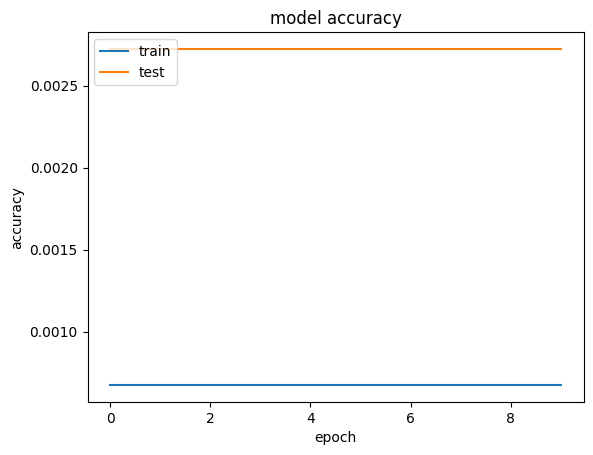

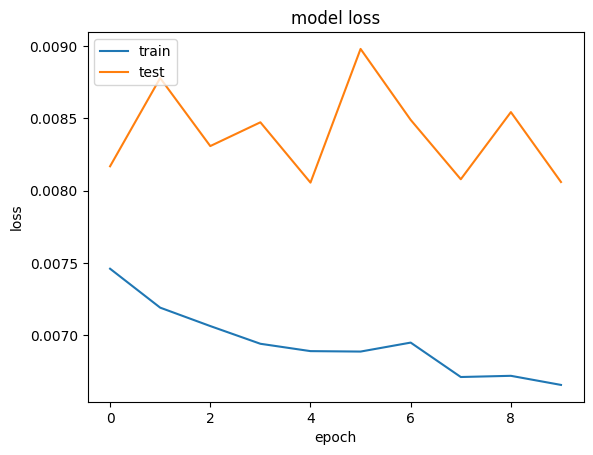

In [ ]:
compute('Ozone')

Epoch 1/10
47/47 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 6.7659e-04 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 2/10
47/47 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 6.7659e-04 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 3/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0071 - accuracy: 6.7659e-04 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 4/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0071 - accuracy: 6.7659e-04 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 5/10
47/47 [==============================] - 0s 7ms/step - loss: 0.0071 - accuracy: 6.7659e-04 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 6/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0071 - accuracy: 6.7659e-04 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 7/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0070 - accuracy: 6.7659e-04 - val_loss

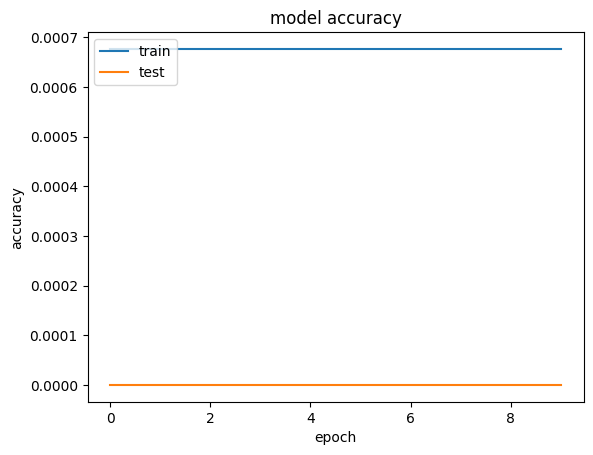

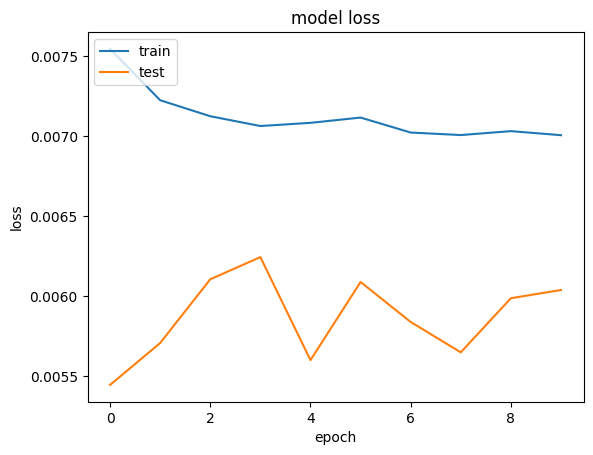

In [ ]:
compute('NO2')

Epoch 1/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.0000e+00 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 2/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.0000e+00 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 3/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 4/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 5/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 7/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss

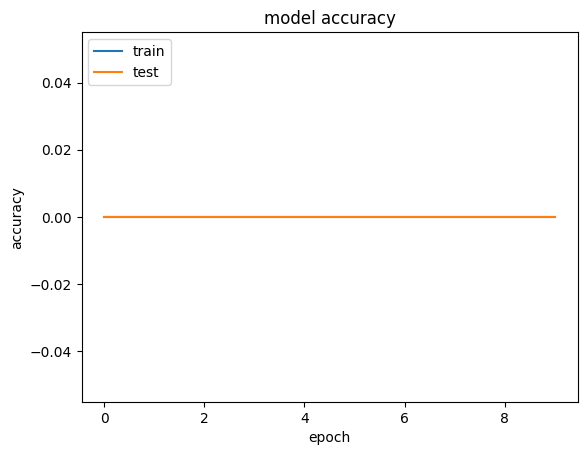

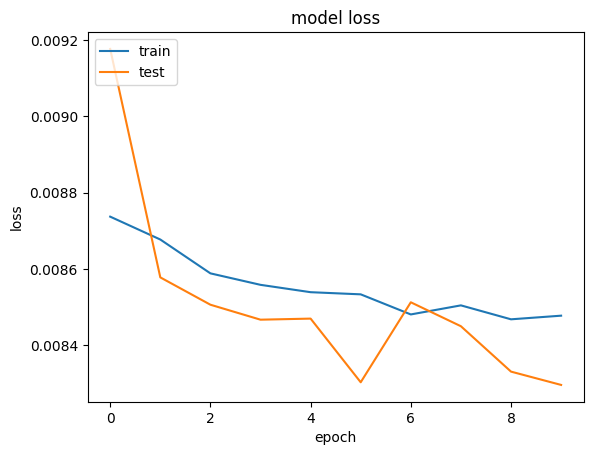

In [ ]:
compute('CO')

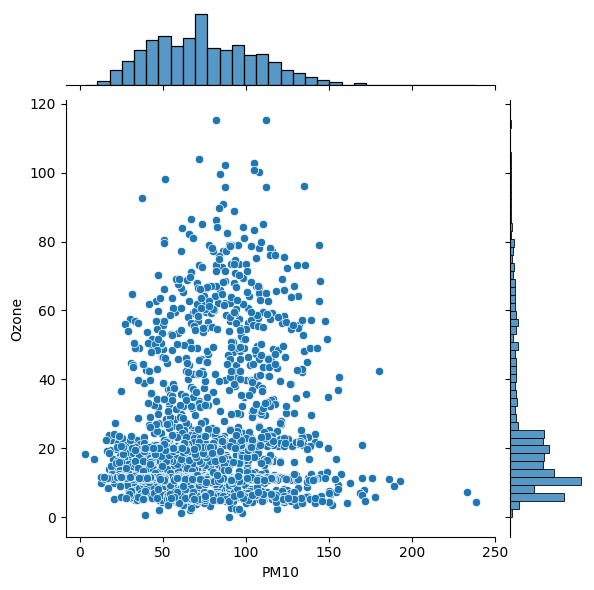

In [ ]:
sns.jointplot(x=df['PM10'], y=df['Ozone'], data = df)

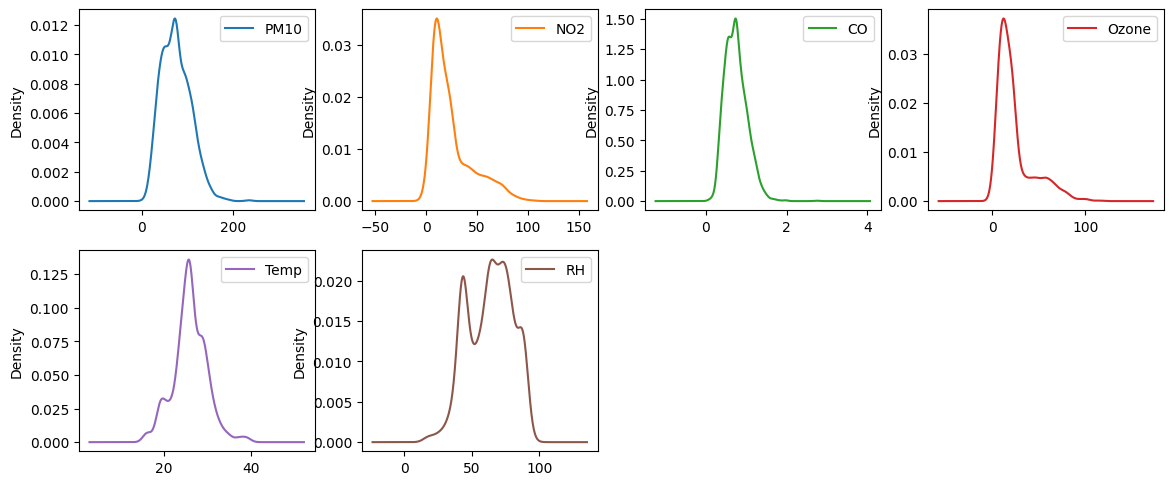

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(14,12))
plt.show()

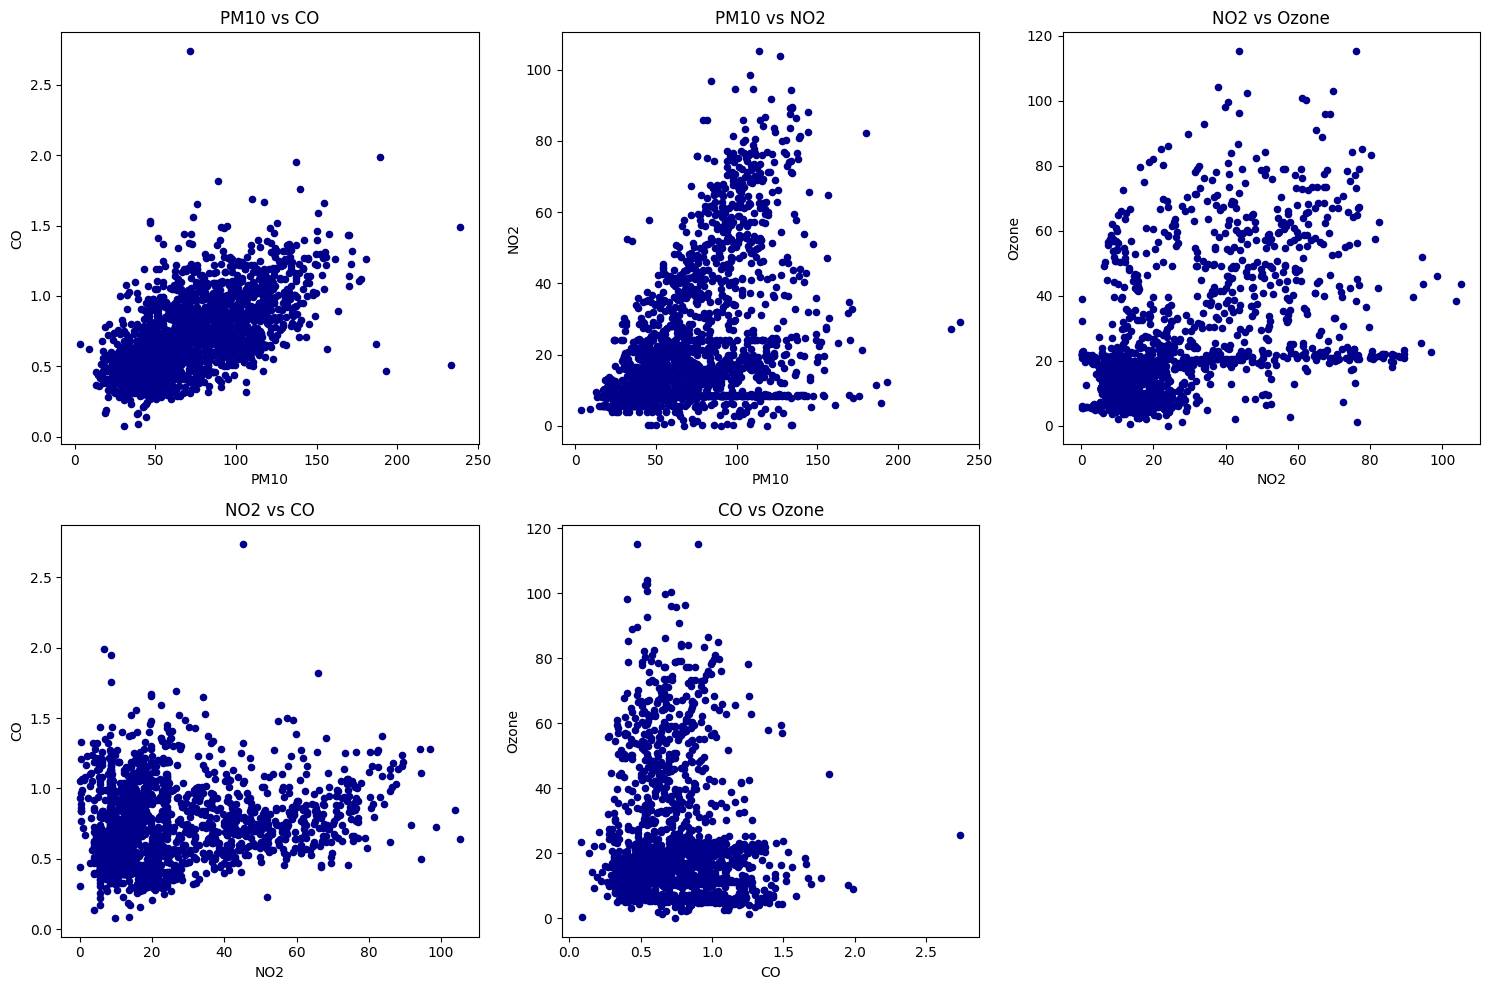

In [ ]:

# Create a figure and axes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the scatter plots
df.plot.scatter(x='PM10', y='CO', c='DarkBlue', ax=axs[0, 0])
axs[0, 0].set_title('PM10 vs CO')

df.plot.scatter(x='PM10', y='NO2', c='DarkBlue', ax=axs[0, 1])
axs[0, 1].set_title('PM10 vs NO2')

df.plot.scatter(x='NO2', y='Ozone', c='DarkBlue', ax=axs[0, 2])
axs[0, 2].set_title('NO2 vs Ozone')

df.plot.scatter(x='NO2', y='CO', c='DarkBlue', ax=axs[1, 0])
axs[1, 0].set_title('NO2 vs CO')

df.plot.scatter(x='CO', y='Ozone', c='DarkBlue', ax=axs[1, 1])
axs[1, 1].set_title('CO vs Ozone')

# Remove the last subplot as it's not needed
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()



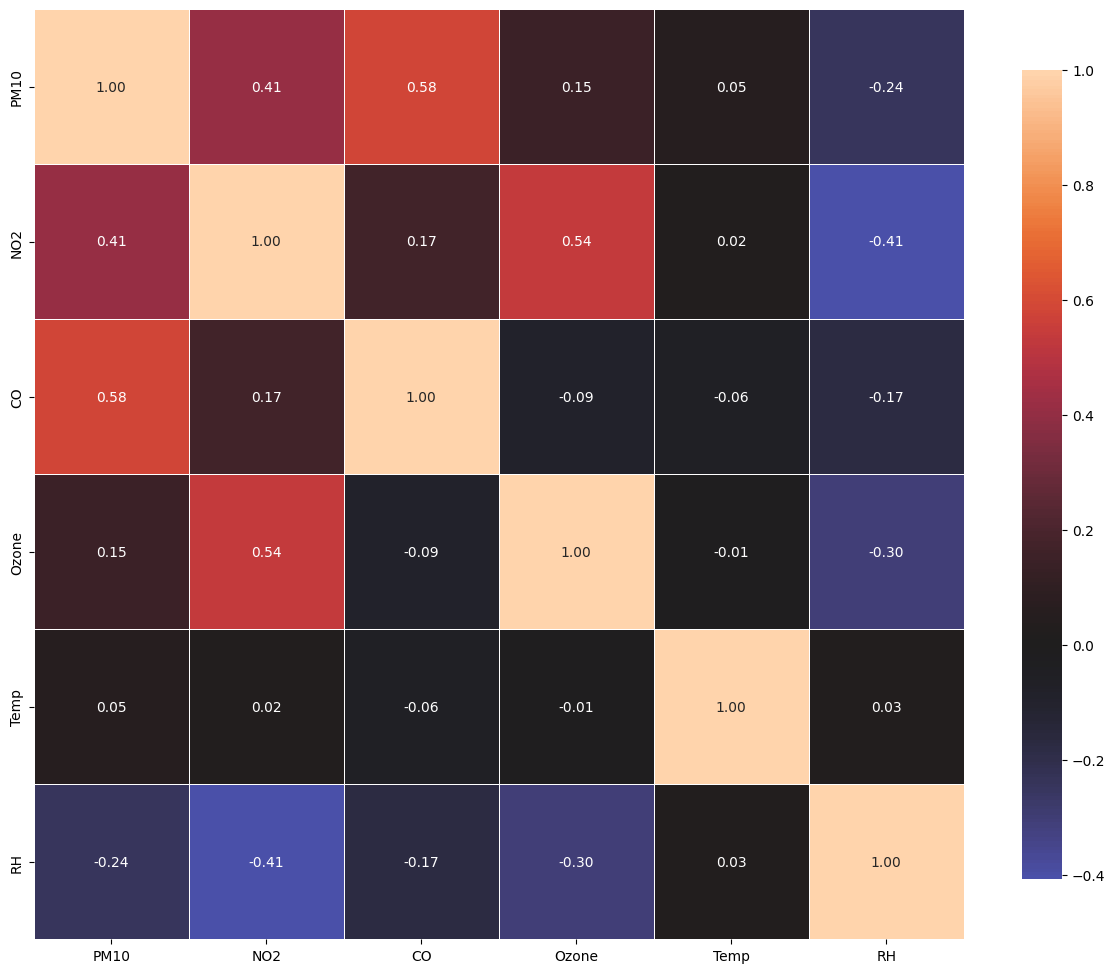

In [ ]:


# Convert non-numeric columns to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop columns with NaN values
df_numeric = df_numeric.dropna(axis=1)

# Calculate correlations
correlations = df_numeric.corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()


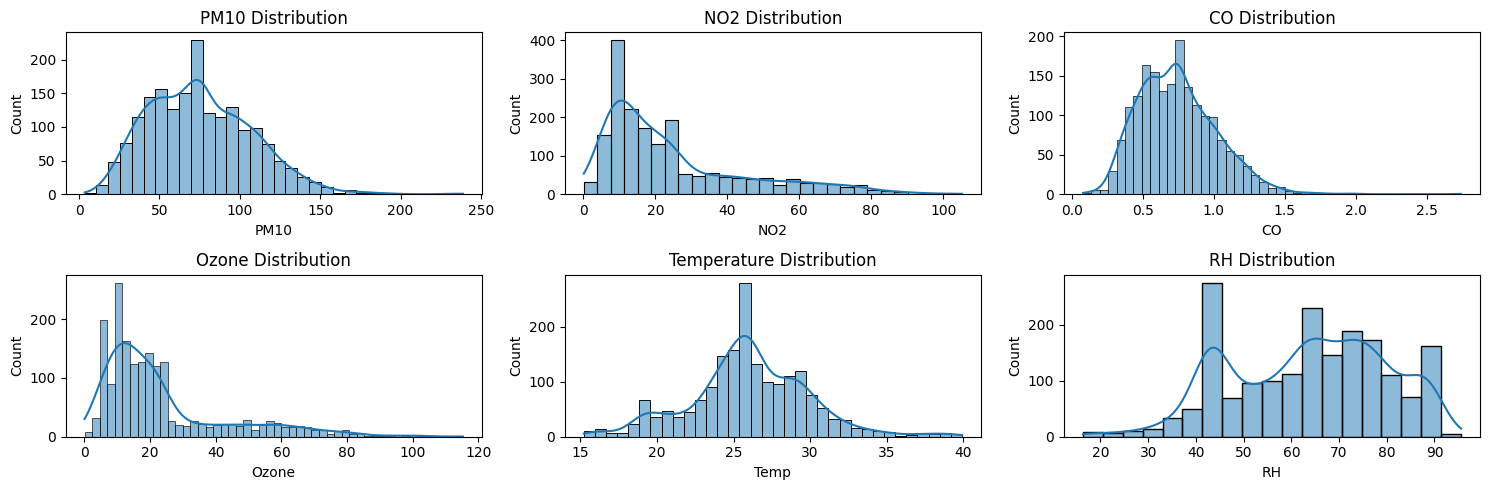

In [ ]:
# Plot histograms for visual inspection
plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
sns.histplot(df['PM10'], kde=True)
plt.title('PM10 Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['NO2'], kde=True)
plt.title('NO2 Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['CO'], kde=True)
plt.title('CO Distribution')

plt.subplot(2, 3, 4)
sns.histplot(df['Ozone'], kde=True)
plt.title('Ozone Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['Temp'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(2, 3, 6)
sns.histplot(df['RH'], kde=True)
plt.title('RH Distribution')

plt.tight_layout()
plt.show()



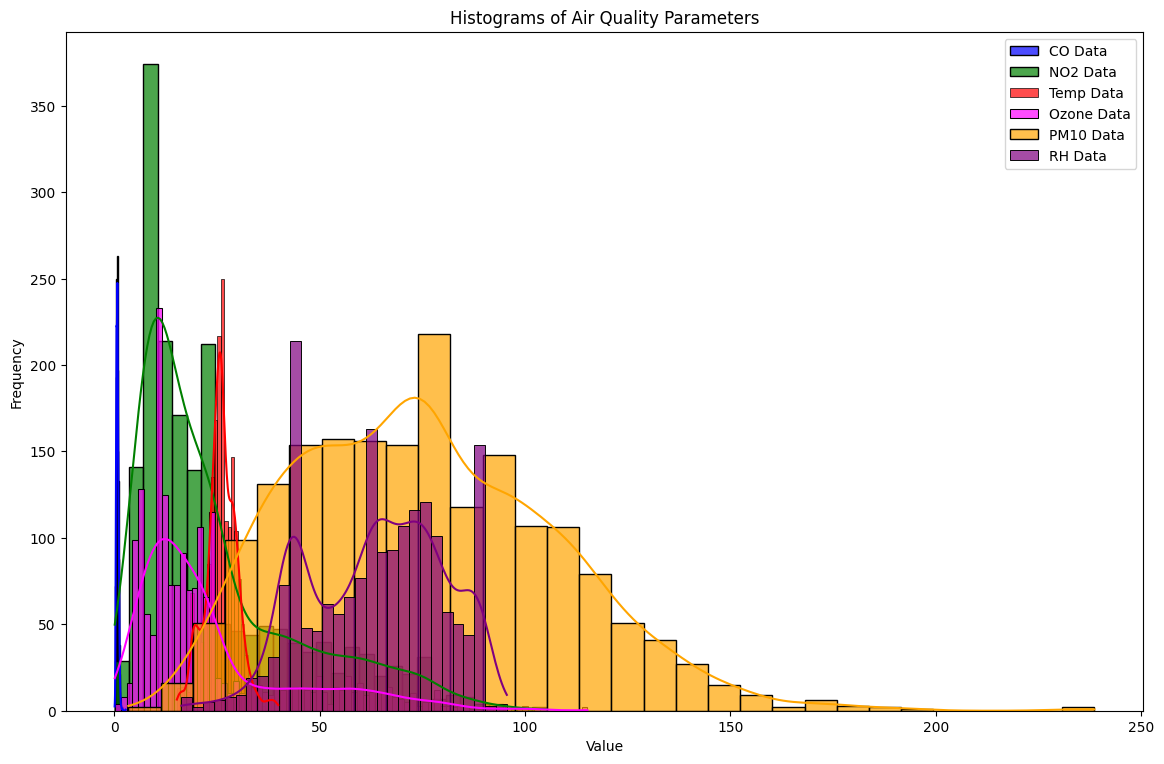

In [ ]:
plt.figure(figsize=(12, 8))

# Plot histograms for each air quality parameter
sns.histplot(df['CO'], bins=30, kde=True, color='blue', alpha=0.7, label='CO Data')
sns.histplot(df['NO2'], bins=30, kde=True, color='green', alpha=0.7, label='NO2 Data')
sns.histplot(df['Temp'], bins=30, kde=True, color='red', alpha=0.7, label='Temp Data')
sns.histplot(df['Ozone'], bins=80, kde=True, color='magenta', alpha=0.7, label='Ozone Data')
sns.histplot(df['PM10'], bins=30, kde=True, color='orange', alpha=0.7, label='PM10 Data')
sns.histplot(df['RH'], bins=30, kde=True, color='purple', alpha=0.7, label='RH Data')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Air Quality Parameters')
plt.tight_layout(pad=2.0)
plt.show()